In [1]:
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
from datetime import datetime

In [2]:
raw = pd.read_csv('Apartment_List_Rent_Estimates_2023_04.csv')
raw.head()

,location_name,location_type,location_fips_code,population,state,county,metro,bed_size,2017_01,2017_02,...,2022_07,2022_08,2022_09,2022_10,2022_11,2022_12,2023_01,2023_02,2023_03,2023_04
0,United States,National,0,324697795,NaN,NaN,NaN,overall,1029.0,1030.0,...,1383,1388,1381,1369,1354,1341,1337,1341,1348,1355
1,United States,National,0,324697795,NaN,NaN,NaN,1br,883.0,884.0,...,1187,1190,1185,1174,1161,1150,1147,1150,1157,1162
2,United States,National,0,324697795,NaN,NaN,NaN,2br,1012.0,1013.0,...,1360,1364,1358,1346,1331,1318,1314,1318,1325,1332
3,California,State,6,39283497,California,NaN,NaN,overall,1559.0,1563.0,...,1998,2005,1997,1976,1947,1925,1915,1921,1932,1941
4,California,State,6,39283497,California,NaN,NaN,1br,1313.0,1317.0,...,1683,1689,1682,1664,1640,1622,1613,1618,1627,1635


In [3]:
formatted_df = pd.melt(raw, id_vars=['location_name', 'location_type', 'location_fips_code', 'population', 'state', 'county',
                                    'metro', 'bed_size'], var_name='date', value_name='median_rent_price')
formatted_df.head()

,location_name,location_type,location_fips_code,population,state,county,metro,bed_size,date,median_rent_price
0,United States,National,0,324697795,NaN,NaN,NaN,overall,2017_01,1029.0
1,United States,National,0,324697795,NaN,NaN,NaN,1br,2017_01,883.0
2,United States,National,0,324697795,NaN,NaN,NaN,2br,2017_01,1012.0
3,California,State,6,39283497,California,NaN,NaN,overall,2017_01,1559.0
4,California,State,6,39283497,California,NaN,NaN,1br,2017_01,1313.0


In [4]:
johnson_co_data_df = formatted_df.loc[formatted_df['location_name'] == 'Johnson County, KS']
johnson_co_data_df.head()

,location_name,location_type,location_fips_code,population,state,county,metro,bed_size,date,median_rent_price
822,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",overall,2017_01,1036.0
823,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",1br,2017_01,875.0
824,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",2br,2017_01,1062.0
4200,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",overall,2017_02,1041.0
4201,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",1br,2017_02,878.0


In [8]:
#convert data in date column to a date format recognized by pandas
dates_string = johnson_co_data_df['date']
date_obj = pd.to_datetime(dates_string, format='%Y_%m')
johnson_co_data_df['date'] = date_obj
johnson_co_data_df

C:\Users\nickp\AppData\Local\Temp\ipykernel_26192\2948171459.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  johnson_co_data_df['date'] = date_obj


,location_name,location_type,location_fips_code,population,state,county,metro,bed_size,date,median_rent_price
822,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",overall,2017-01-01,1036.0
823,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",1br,2017-01-01,875.0
824,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",2br,2017-01-01,1062.0
4200,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",overall,2017-02-01,1041.0
4201,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",1br,2017-02-01,878.0
...,...,...,...,...,...,...,...,...,...,...
250795,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",1br,2023-03-01,1166.0
250796,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",2br,2023-03-01,1416.0
254172,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",overall,2023-04-01,1402.0
254173,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",1br,2023-04-01,1184.0


Text(0, 0.5, 'price(USD)')

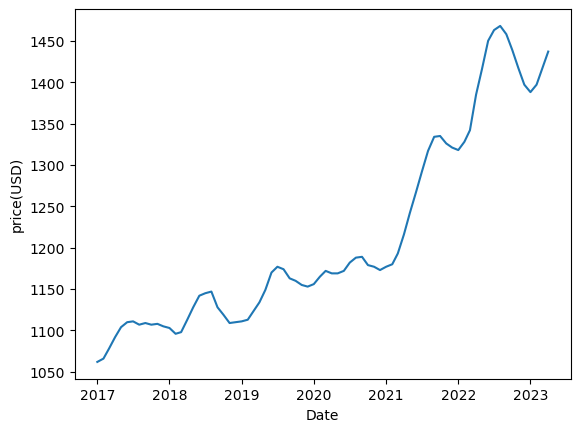

In [14]:
one_bed_df = johnson_co_data_df[johnson_co_data_df['bed_size'] == '2br']
x_axis = one_bed_df['date']
y_axis = one_bed_df['median_rent_price']
plt.plot(x_axis, y_axis)
plt.xlabel('Date')
plt.ylabel('price(USD)')
